In [1]:
import os

import Algorithmia
import joblib
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load and split data.
from sklearn import datasets
data = datasets.load_breast_cancer()
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = (
    pd.DataFrame(X.astype(np.float32), columns=data["feature_names"]),
    pd.Series(y)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit a simple logistic regression model.
clf = LogisticRegression(max_iter=3000, verbose=False).fit(X_train, y_train)

# Generate predictions from the model.
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Create a directory to save serialized model files.
model_dir = "models/"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# Serialize the model.
model_file = "Algorithmia_Tutorial_Model.joblib"
model_file_path = model_dir+model_file
joblib.dump(clf, model_file_path)

['models/Algorithmia_Tutorial_Model.joblib']

In [2]:
# CLUSTER_DOMAIN = "CLUSTER_DOMAIN"
COLLECTION_OWNER = "algorithmiahq"
ALGORITHMIA_API_KEY = os.getenv("PROD_USER_API_KEY")
print(ALGORITHMIA_API_KEY)

sim69Inu79NOWc38XU7JFyUNfZG1


In [3]:
# Create a hosted data collection if it doesn't already exist.
client = Algorithmia.client(ALGORITHMIA_API_KEY)
collection_uri = "data://"+COLLECTION_OWNER+"/ArizeDemo"
collection = client.dir(collection_uri)
if not collection.exists():
    collection.create()

# Upload model file and test data to data collection.
client.file(collection_uri+"/"+model_file).putFile(model_file_path)

In [5]:
!pip install shap

     |████████████████████████████████| 356 kB 5.5 MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.39.0-cp38-cp38-macosx_10_9_x86_64.whl size=415916 sha256=8edc0b126087a0eb897661e992946dc14e1c6b5bf0ba1df2f51fc603f73ab18e
  Stored in directory: /Users/ezracitron/Library/Caches/pip/wheels/3d/c9/06/734ed80d6d61fad331974bf62017b4ea6b33488082b9f5e67e
Successfully built shap


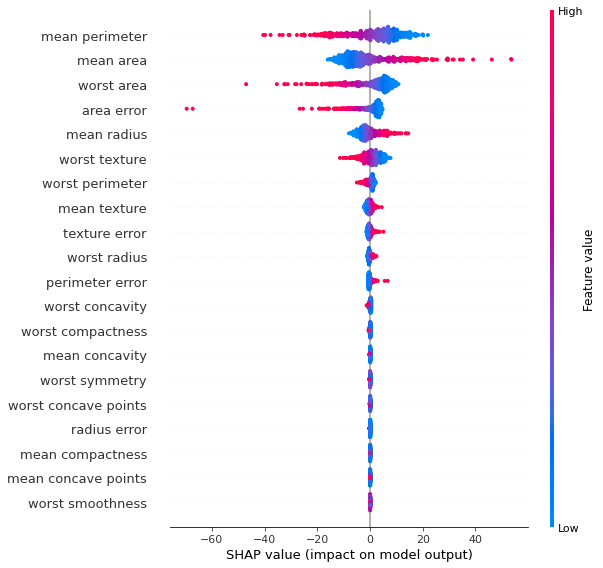

In [6]:
import shap
def get_shap_values(model, X_data, ExplainerType=shap.Explainer, show_graph=False):
    # NOTE: If there are errors, you'll need to manually select the explainer class.
    explainer = ExplainerType(model, X_data)
    shap_values = explainer.shap_values(X_data)

    # In development, it can be valuable to check graphs for feature explainability.
    if show_graph:
        shap.summary_plot(shap_values, X_data, feature_names=data['feature_names'])

    # NOTE: The Arize API expects a pandas DataFrame of the same shape and with
    #       the same column names as the model features.
    return pd.DataFrame(shap_values, columns=data["feature_names"])

shap_values = get_shap_values(clf, X, show_graph=True)

In [24]:
import Algorithmia

# Define variables to uniquely identify algorithm.
ALGO_OWNER = "ALGO_OWNER"
ALGO_NAME = "ALGO_NAME"
ALGO_VERSION = "ALGO_VERSION"

# Build algorithm identifier and instantiate client.
ALGO_IDENTIFIER = ALGO_OWNER+"/"+ALGO_NAME+"/"+ALGO_VERSION
client = Algorithmia.client(ALGORITHMIA_API_KEY, CLUSTER_DOMAIN)
algo = client.algo(ALGO_IDENTIFIER)

# Optionally set timeout parameters for testing purposes.
algo.set_options(timeout=60)

In [25]:
# Create demo data, serialize to JSON, and pipe into algorithm.
_, X_test_2, _, y_test_2 = train_test_split(X, y, test_size=0.02)
input = X_test_2.to_json()
result_json = algo.pipe(input).result

# Just like input, output is JSON object, so convert back into pd.DataFrame.
result = pd.read_json(result_json)

In [30]:
input = X_test_2.head(2).to_json()
algo.pipe(input).result

'{"0":{"8c3acf7b-485a-4066-bacc-c9f0e8e312e2":1,"4fd70f1b-d0e0-44af-ba8a-c41ec4b58187":0}}'

In [7]:
import os
import Algorithmia

ALGORITHMIA_API_KEY = os.getenv("PROD_USER_API_KEY")

# Define same variables as in your algorithm.
ALGO_OWNER = "algorithmiahq"
ALGO_NAME = "ArizeDemo"
ALGO_VERSION = "f35025657bdc37eb0d6ffeed62b0539ee21c8b4e"

ALGO_IDENTIFIER = ALGO_OWNER+"/"+ALGO_NAME+"/"+ALGO_VERSION

client = Algorithmia.client(ALGORITHMIA_API_KEY)
algo = client.algo(ALGO_IDENTIFIER)
algo.set_options(timeout=60)

input = """{"mean radius":{"294":12.720000267,"516":18.3099994659},"mean texture":{"294":13.779999733,"516":20.5799999237},"mean perimeter":{"294":81.7799987793,"516":120.8000030518},"mean area":{"294":492.1000061035,"516":1052.0},"mean smoothness":{"294":0.0966700017,"516":0.1067999974},"mean compactness":{"294":0.0839300007,"516":0.1247999966},"mean concavity":{"294":0.0128800003,"516":0.1569000036},"mean concave points":{"294":0.0192399994,"516":0.0945099965},"mean symmetry":{"294":0.1638000011,"516":0.1860000044},"mean fractal dimension":{"294":0.0610000007,"516":0.0594099984},"radius error":{"294":0.1807000041,"516":0.5449000001},"texture error":{"294":0.6930999756,"516":0.9225000143},"perimeter error":{"294":1.3400000334,"516":3.2179999352},"area error":{"294":13.3800001144,"516":67.3600006104},"smoothness error":{"294":0.0060640001,"516":0.006176},"compactness error":{"294":0.0118000004,"516":0.01877},"concavity error":{"294":0.0065640002,"516":0.0291300006},"concave points error":{"294":0.0079779997,"516":0.0104599996},"symmetry error":{"294":0.0137400003,"516":0.01559},"fractal dimension error":{"294":0.001392,"516":0.002725},"worst radius":{"294":13.5,"516":21.8600006104},"worst texture":{"294":17.4799995422,"516":26.2000007629},"worst perimeter":{"294":88.5400009155,"516":142.1999969482},"worst area":{"294":553.700012207,"516":1493.0},"worst smoothness":{"294":0.1298000067,"516":0.1492000073},"worst compactness":{"294":0.1472000033,"516":0.2536000013},"worst concavity":{"294":0.0523299985,"516":0.3759000003},"worst concave points":{"294":0.0634299964,"516":0.1509999931},"worst symmetry":{"294":0.2369000018,"516":0.3073999882},"worst fractal dimension":{"294":0.069219999,"516":0.0786300004}}"""
algo.pipe(input).result
# --> '{"0":{"2ef8ffea-72ed-43e7-a6d2-21b5465efd2c":1,"0ccdb2f0-11e6-49a7-982a-303c91b5edd0":0}}'

'{"0":{"ebf351fe-8651-4474-87bf-e460d6feeb3c":1,"d5dcbfaa-87ba-46b1-96cb-f3d30c2f5a99":0}}'

In [3]:
# NOTE: Input to algorithm must be serialized to JSON (cannot pass a pd.DataFrame directly).
client = Algorithmia.client(ALGORITHMIA_API_KEY)
algo = client.algo(ALGO_IDENTIFIER)
# Optionally set timeout parameters for testing purposes.
algo.set_options(timeout=60)

In [15]:
# Actual format shape of input for pipe(input) should depend on your algorithm
result = algo.pipe(input).result
result

'{"0":{"3e9f34c3-5409-4d5f-a0ef-e79571b89b19":1,"3a96bcf7-81e5-4b0b-a311-f5e60319b54e":0}}'